In [7]:
rawData['timestamp'] = pd.to_datetime(rawData['timestamp'])

In [8]:
rawData['datetime'] = rawData['timestamp']

In [1]:
# 회귀모형 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

# 쓸데없는 알림 방지
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#통계적 모형
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#머신러닝
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

In [2]:
rawData = pd.read_csv('C:/Users/scien/Videos/london_bike/london_merged.csv')

In [3]:
rawData

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [4]:
round(rawData.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.10,1085.11,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.47,5.57,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.52,6.62,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.32,14.31,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.91,7.89,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.72,2.34,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.02,0.15,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.29,0.45,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.49,1.12,0.0,0.0,1.0,2.00,3.0


In [5]:
rawData.weather_code.unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [6]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
rawData['timestamp'] = pd.to_datetime(rawData['timestamp'])

In [8]:
rawData['datetime'] = rawData['timestamp']

In [9]:
rawData

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,datetime
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04 00:00:00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04 01:00:00
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04 02:00:00
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04 03:00:00
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017-01-03 19:00:00
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017-01-03 20:00:00
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017-01-03 21:00:00
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017-01-03 22:00:00


In [10]:
rawData.set_index('datetime', inplace=True)

In [11]:
rawData.index # 프리퀀시가 지정되어있지 않다. 

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=17414, freq=None)

In [12]:
rawData.asfreq('H') # H hour D day M month 

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
datetime,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182.0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042.0,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,2017-01-03 20:00:00,541.0,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,2017-01-03 21:00:00,337.0,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


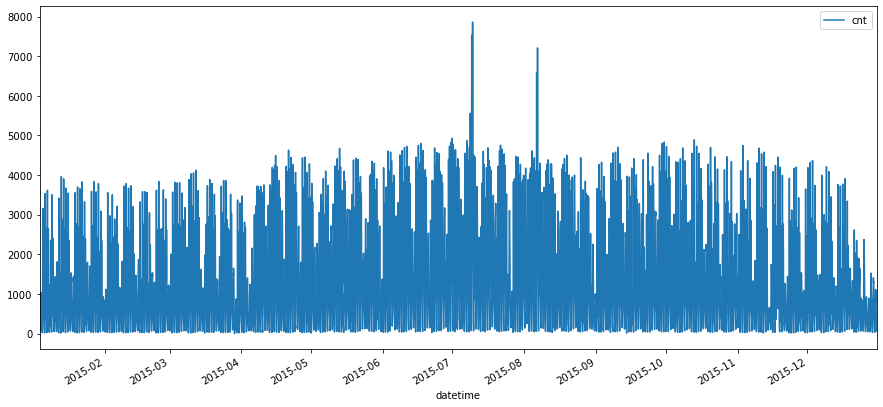

In [13]:
rawData[['cnt']].plot(figsize=(15, 7), xlim=('2015-01-04', '2015-12-31'))

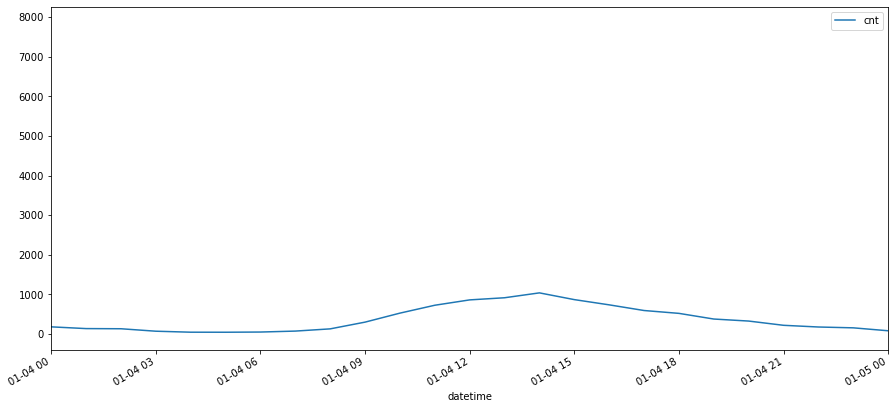

In [14]:
rawData[['cnt']].plot(figsize=(15, 7), xlim=('2015-01-04', '2015-1-05'))

# 어떤 패턴들이 보이고 있다. 

In [15]:
rawData.timestamp.dt.month

datetime
2015-01-04 00:00:00    1
2015-01-04 01:00:00    1
2015-01-04 02:00:00    1
2015-01-04 03:00:00    1
2015-01-04 04:00:00    1
                      ..
2017-01-03 19:00:00    1
2017-01-03 20:00:00    1
2017-01-03 21:00:00    1
2017-01-03 22:00:00    1
2017-01-03 23:00:00    1
Name: timestamp, Length: 17414, dtype: int64

In [16]:
rawData['year'] = rawData.timestamp.dt.year

In [17]:
rawData['month'] = rawData.timestamp.dt.month

In [18]:
rawData['day'] = rawData.timestamp.dt.day

In [19]:
rawData['hour'] = rawData.timestamp.dt.hour

In [20]:
rawData['dayofweek'] = rawData.timestamp.dt.dayofweek

In [21]:
rawData

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek
datetime,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,6
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,6
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,6
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,6
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19,1
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20,1
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21,1


In [22]:
rawData['cnt'].shift(1) # 1칸씩 밀려나는 것을 볼 수 있다 

datetime
2015-01-04 00:00:00       NaN
2015-01-04 01:00:00     182.0
2015-01-04 02:00:00     138.0
2015-01-04 03:00:00     134.0
2015-01-04 04:00:00      72.0
                        ...  
2017-01-03 19:00:00    2220.0
2017-01-03 20:00:00    1042.0
2017-01-03 21:00:00     541.0
2017-01-03 22:00:00     337.0
2017-01-03 23:00:00     224.0
Name: cnt, Length: 17414, dtype: float64

In [23]:
rawData['cnt'].shift(2) # 2칸씩 밀어버리기 

datetime
2015-01-04 00:00:00       NaN
2015-01-04 01:00:00       NaN
2015-01-04 02:00:00     182.0
2015-01-04 03:00:00     138.0
2015-01-04 04:00:00     134.0
                        ...  
2017-01-03 19:00:00    2742.0
2017-01-03 20:00:00    2220.0
2017-01-03 21:00:00    1042.0
2017-01-03 22:00:00     541.0
2017-01-03 23:00:00     337.0
Name: cnt, Length: 17414, dtype: float64

In [24]:
rawData['lag_cnt1'] = rawData['cnt'].shift(1)
rawData['lag_cnt2'] = rawData['cnt'].shift(2)

In [25]:
rawData['lag_cnt1'].fillna(method='bfill', inplace=True)
rawData['lag_cnt2'].fillna(method='bfill', inplace=True)

In [26]:
rawData

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek,lag_cnt1,lag_cnt2
datetime,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,6,182.0,182.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,6,182.0,182.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,6,138.0,182.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,6,134.0,138.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,6,72.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19,1,2220.0,2742.0
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20,1,1042.0,2220.0
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21,1,541.0,1042.0


In [27]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  year          17414 non-null  int64         
 11  month         17414 non-null  int64         
 12  day           17414 non-null  int64         
 13  hour          17414 non-null  int64         
 14  dayofweek     17414 non-null  int64         
 15  l

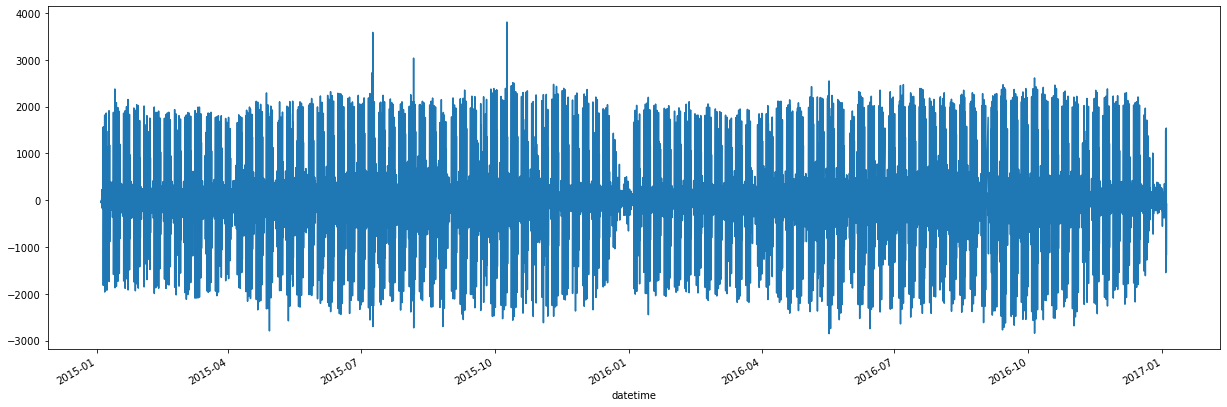

In [28]:
# 차분: 둘 사이의 차이를 변수로 가져간다 
rawData['cnt'].diff().plot(kind='line', figsize=(21,7))

In [29]:
rawData['diff'] = rawData['cnt'].diff()

In [30]:
# 차분의 첫번째 행이 NAN이기 때문에 0으로 채워준다 
rawData['diff'].fillna(method='bfill', inplace=True)

## Y에 대한 영향이 얼마나 되는지 시각적으로 확인 
- 지난번에는 워싱턴 DC에서 발생한 데이터 
- 이번에는 런던 공유 자전거 패턴을 확인해보고 
- 추가적으로 leg count, diff 등의 패턴이 추가되어 추출된 패턴이 얼마나 영향을 주는가? 

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


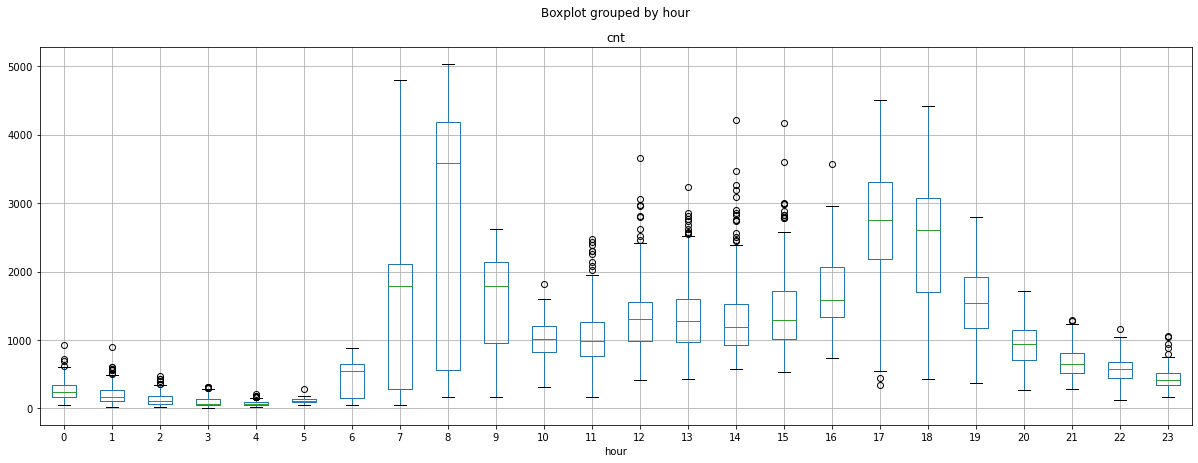

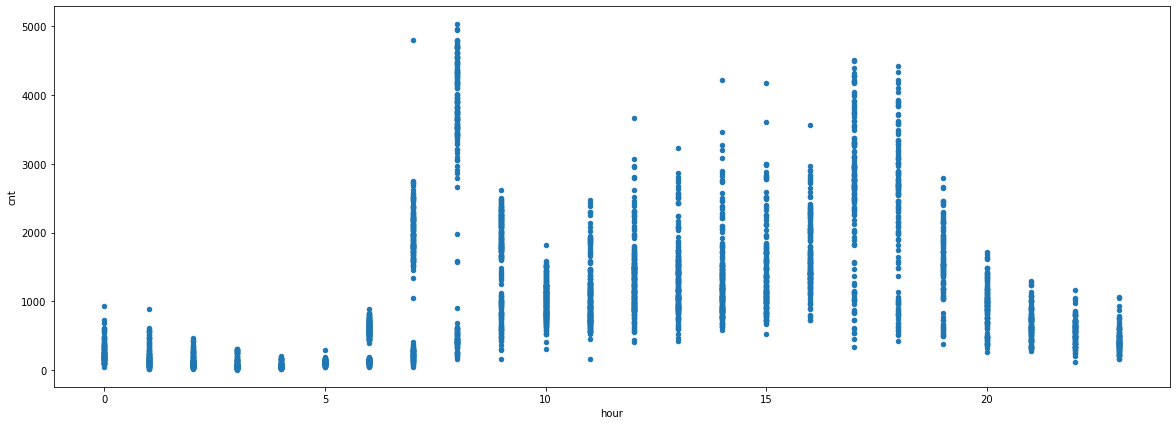

In [31]:
# 시간대별 자전거 대여수 
rawData[rawData['weather_code'] == 3.0].boxplot(column='cnt', by= 'hour', figsize=(20,7))
rawData[rawData['weather_code'] == 3.0].plot.scatter(y='cnt', x= 'hour', figsize=(20,7))
plt.show()

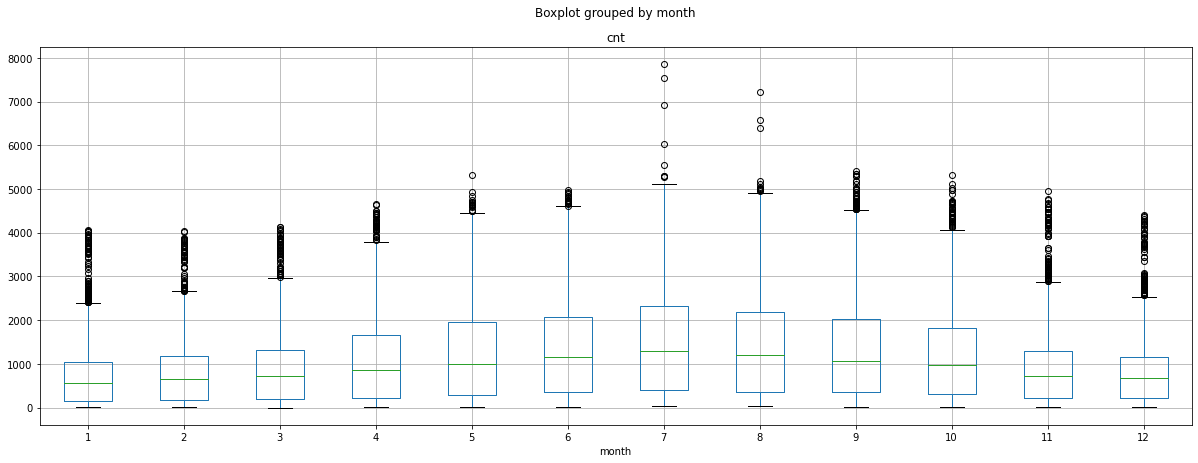

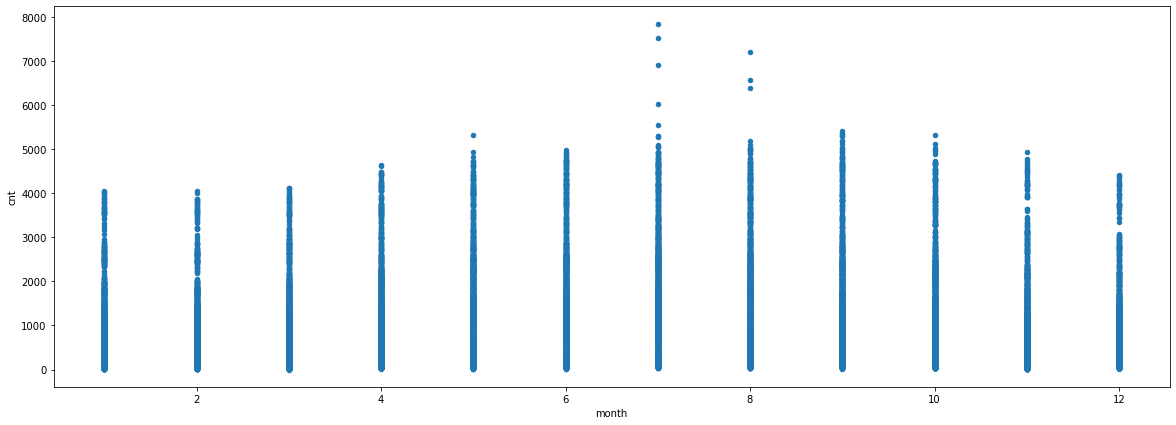

In [32]:
# 월별 자전거 대여수 
rawData.boxplot(column='cnt', by='month', figsize=(20,7))
rawData.plot.scatter(x='month', y='cnt', figsize=(20,7))
plt.show()

In [33]:
rawData.groupby(['is_holiday','is_weekend']).agg({
    'cnt' : [max, min]
})

cnt    
                        max min
is_holiday is_weekend          
0.0        0.0         7860   9
           1.0         4341   0
1.0        0.0         3100  14

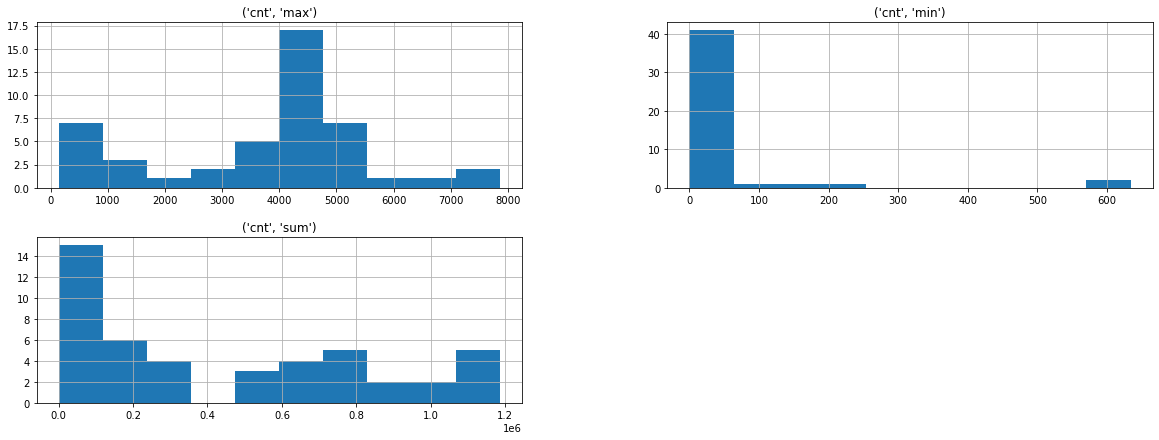

In [34]:
rawData.groupby(['weather_code', 'dayofweek']).agg({
    'cnt' : [sum,min,max]
}).hist(figsize=(20,7))
plt.show()

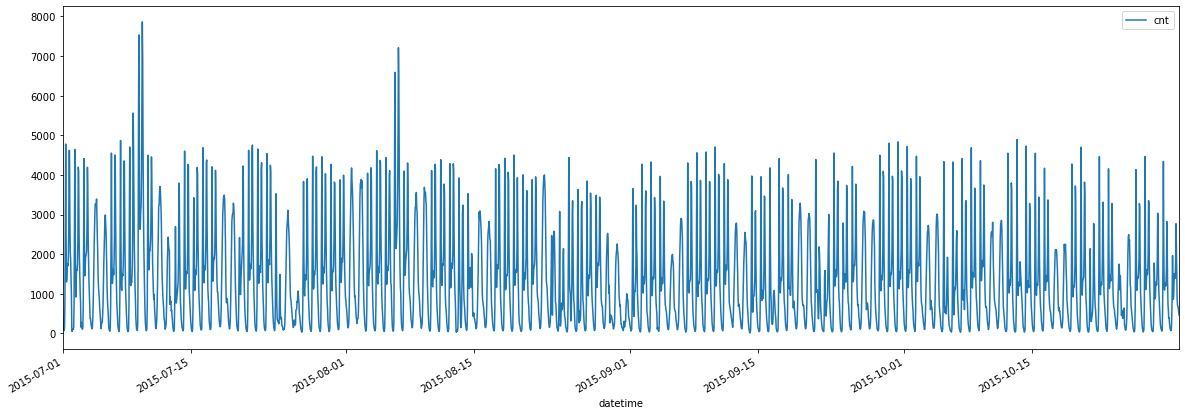

In [35]:
rawData[['cnt']].plot(figsize=(20,7), xlim=('2015-07-01', '2015-10-31'))

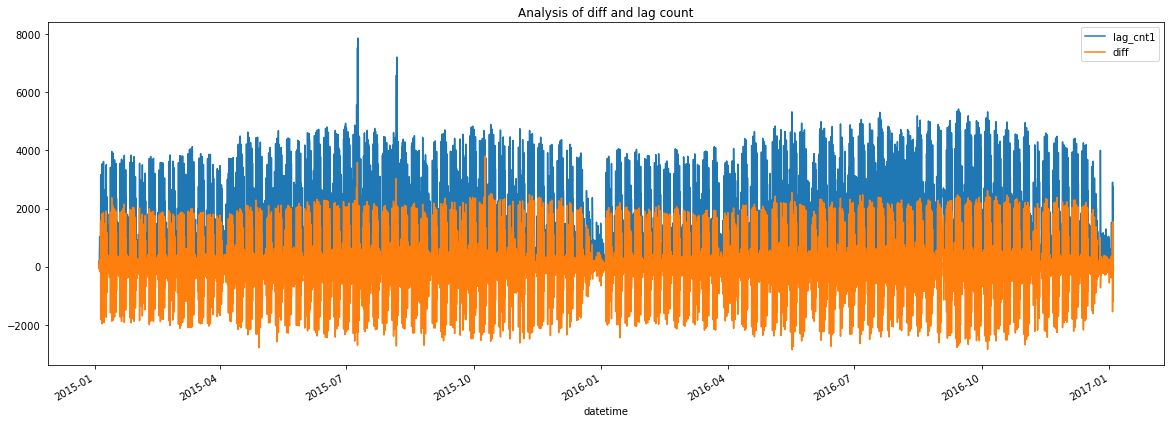

In [36]:
rawData['lag_cnt1'].plot(figsize=(20,7))
#rawData['lag_cnt2'].plot(figsize=(20,7))
rawData['diff'].plot(figsize=(20,7))
plt.title('Analysis of diff and lag count')
plt.legend()
plt.show()

# 인접변수와 반응변수와의 관계

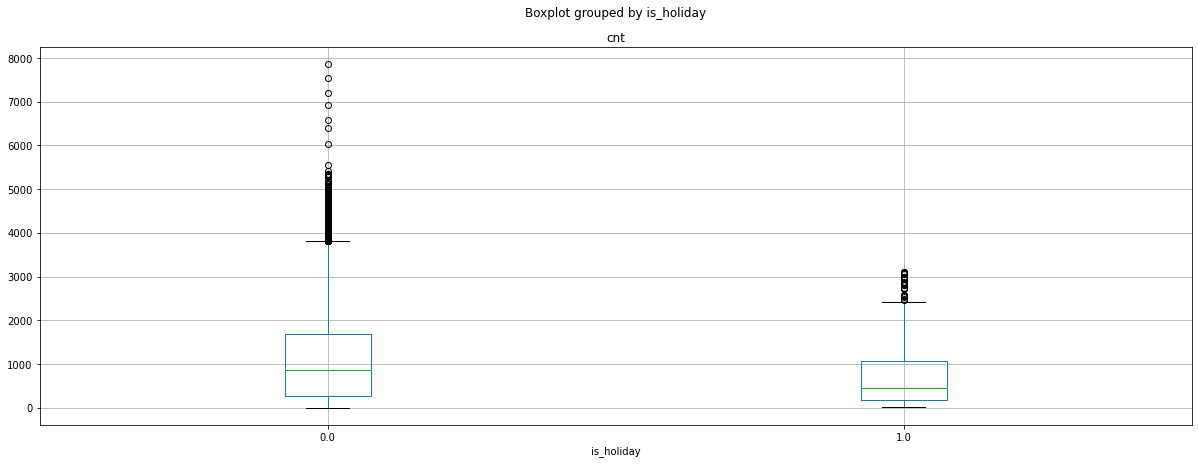

In [37]:
rawData.boxplot(column='cnt', by='is_holiday', grid=True, figsize=(20,7))

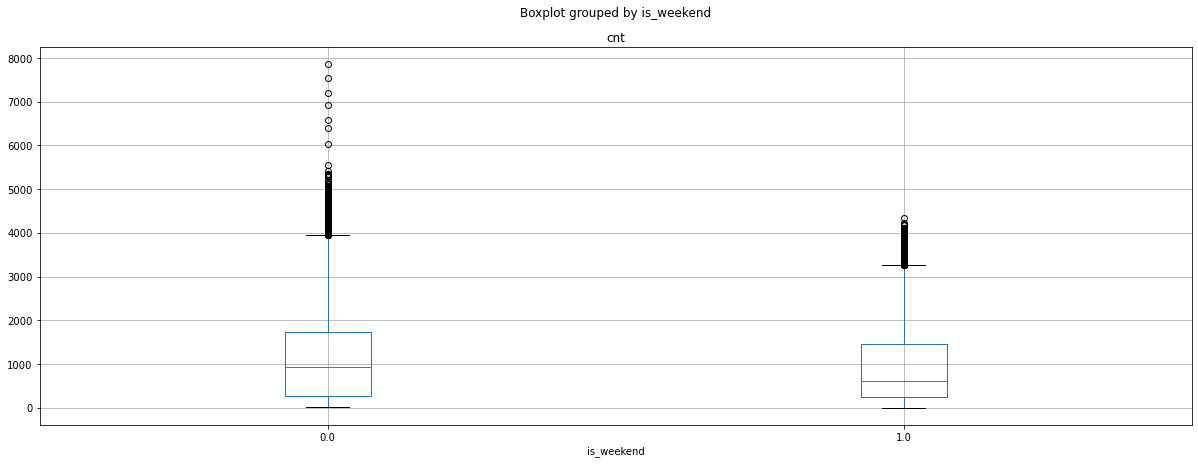

In [38]:
rawData.boxplot(column='cnt', by='is_weekend', grid=True, figsize=(20,7))

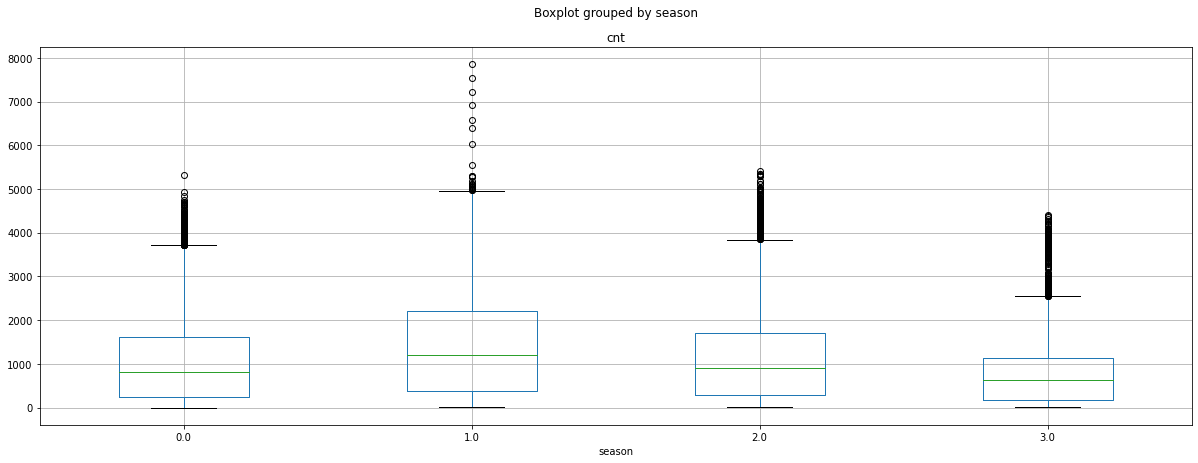

In [39]:
rawData.boxplot(column='cnt', by='season', grid=True, figsize=(20,7))

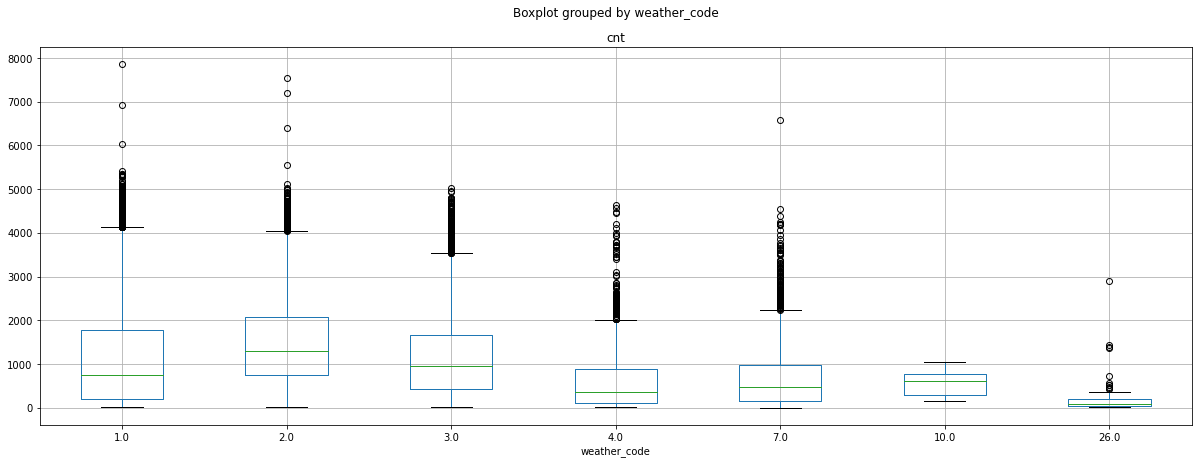

In [40]:
rawData.boxplot(column='cnt', by='weather_code', grid=True, figsize=(20,7))

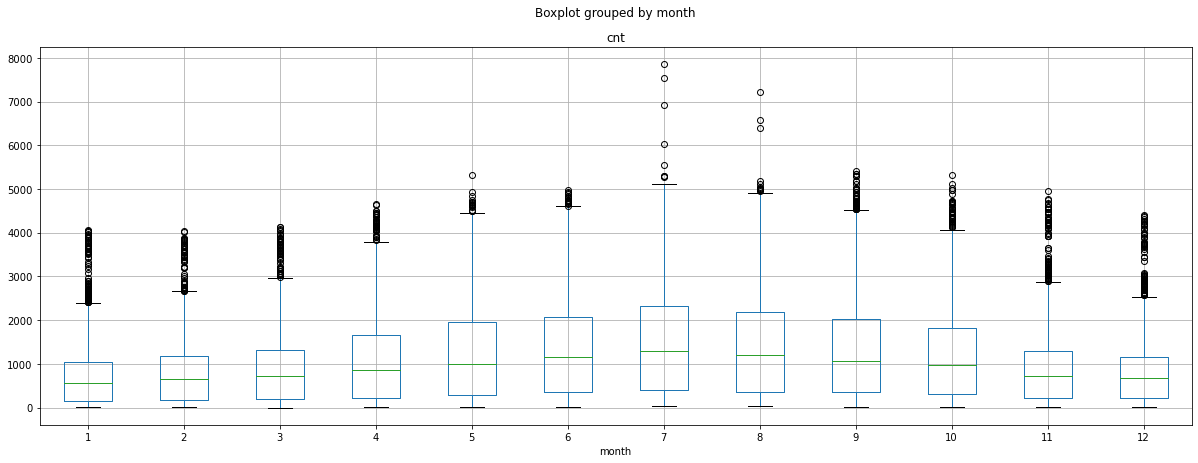

In [41]:
rawData.boxplot(column='cnt', by='month', grid=True, figsize=(20,7))

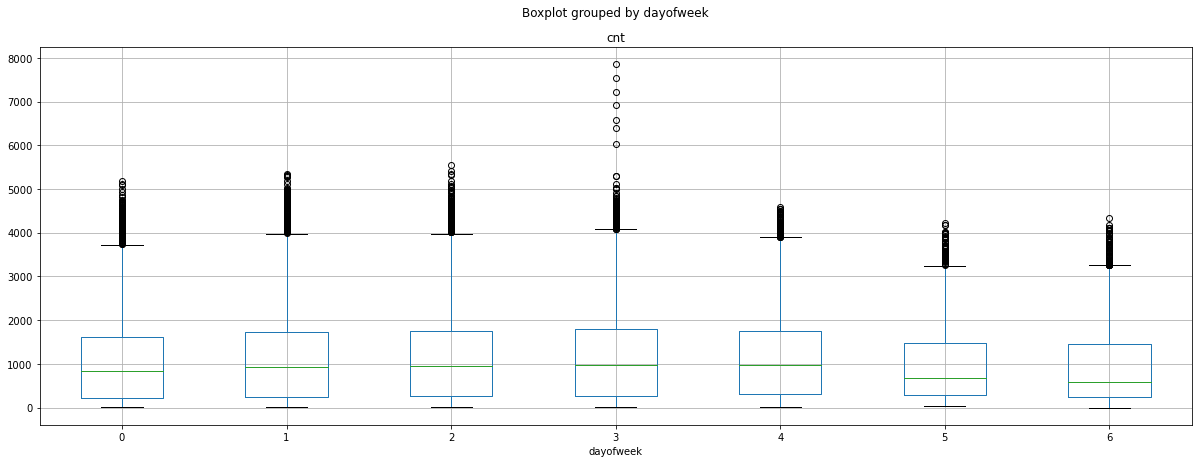

In [42]:
rawData.boxplot(column='cnt', by='dayofweek', grid=True, figsize=(20,7))

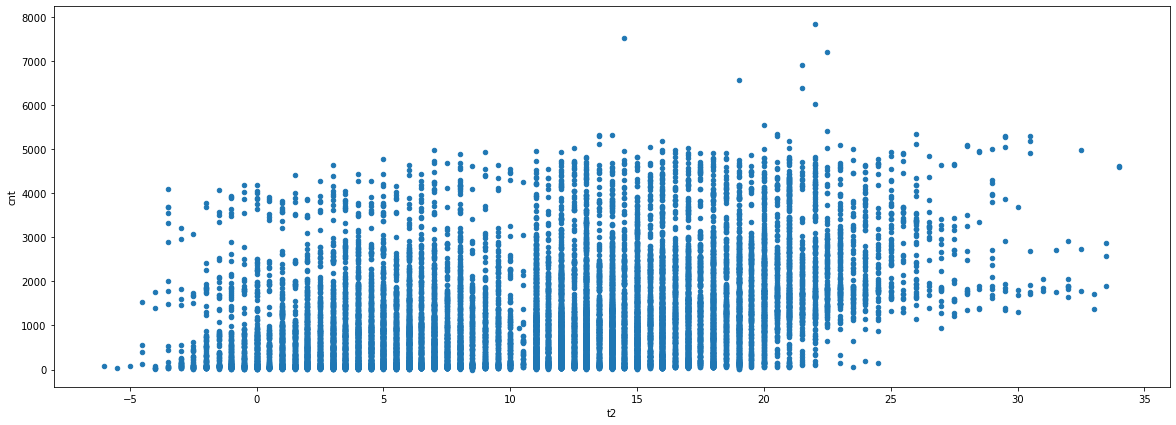

In [43]:
rawData.plot.scatter(y='cnt', x='t2', figsize=(20,7))

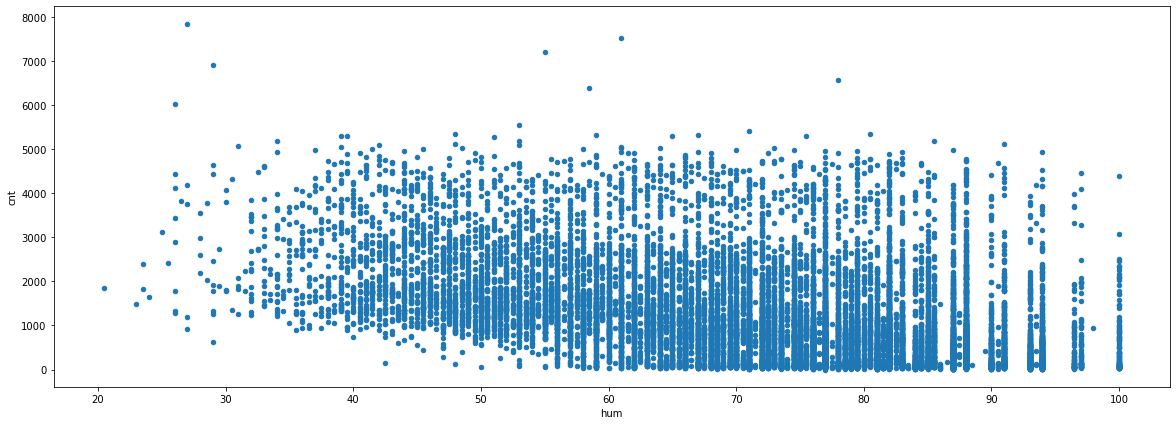

In [44]:
rawData.plot.scatter(y='cnt', x='hum', figsize=(20,7))

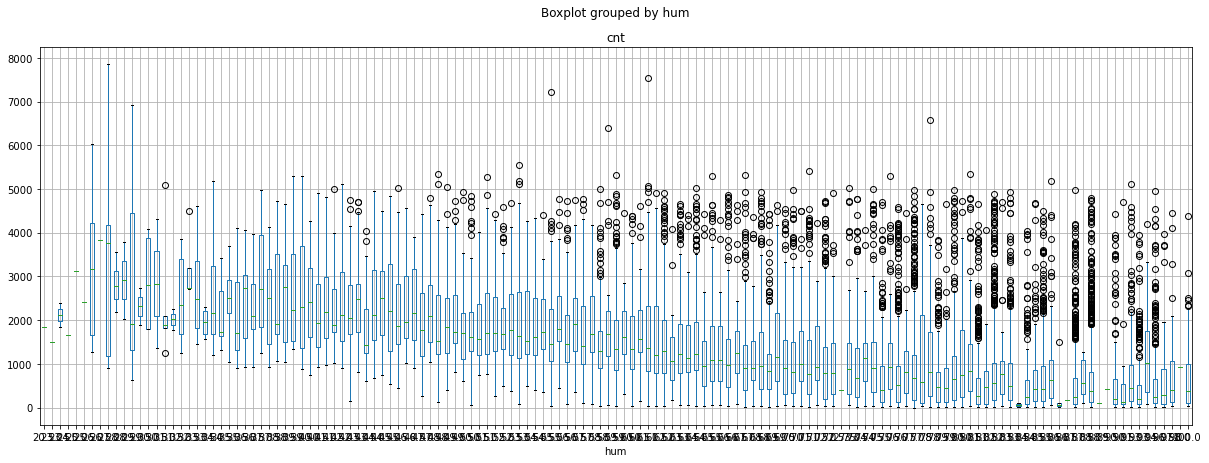

In [45]:
rawData.boxplot(column='cnt', by='hum', figsize=(20,7))

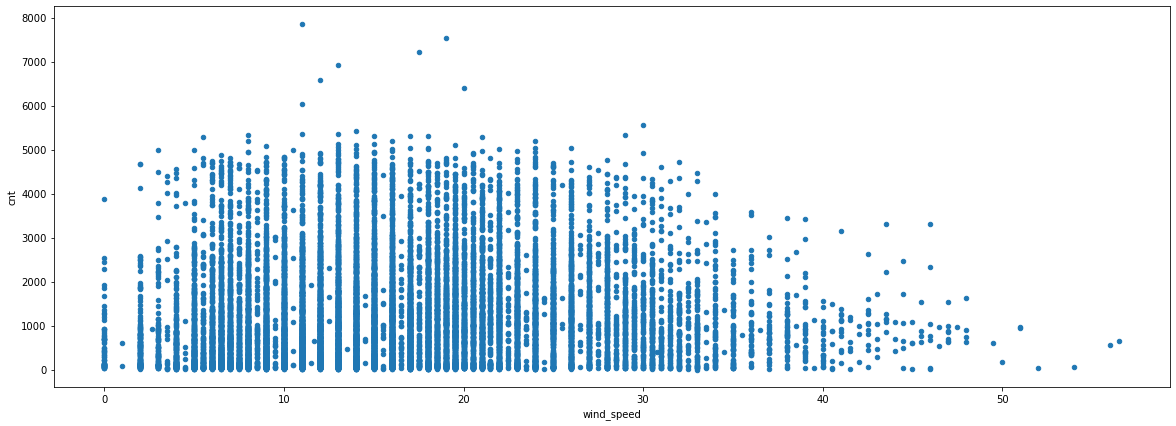

In [46]:
rawData.plot.scatter(y='cnt', x='wind_speed', figsize=(20,7))

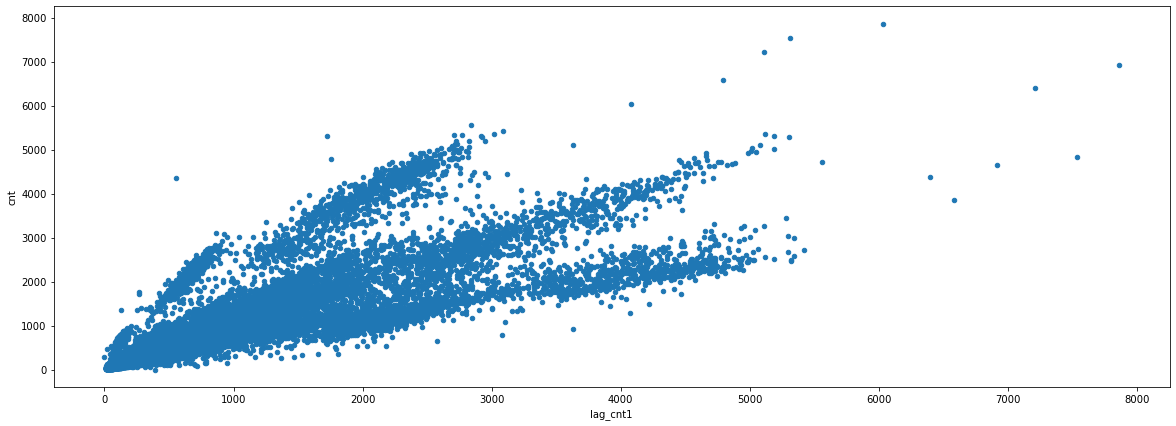

In [47]:
rawData.plot.scatter(y='cnt', x='lag_cnt1', figsize=(20,7))

# 학습 테스트 세트 분리하기 

In [48]:
rawTrain = rawData.loc[rawData.index < '2016-08-01', :]
rawTest = rawData.loc[rawData.index >= '2016-08-01', :]
print(rawTrain.shape, rawTest.shape)

(13713, 18) (3701, 18)


In [49]:
rawTrain

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayofweek,lag_cnt1,lag_cnt2,diff
datetime,,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,6,182.0,182.0,-44.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,6,182.0,182.0,-44.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,6,138.0,182.0,-4.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,6,134.0,138.0,-62.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,6,72.0,134.0,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-31 19:00:00,2016-07-31 19:00:00,2885,21.0,21.0,48.0,8.0,1.0,0.0,1.0,1.0,2016,7,31,19,6,3469.0,3856.0,-584.0
2016-07-31 20:00:00,2016-07-31 20:00:00,2123,21.0,21.0,50.0,9.0,1.0,0.0,1.0,1.0,2016,7,31,20,6,2885.0,3469.0,-762.0
2016-07-31 21:00:00,2016-07-31 21:00:00,1346,20.5,20.5,51.5,12.0,1.0,0.0,1.0,1.0,2016,7,31,21,6,2123.0,2885.0,-777.0


In [54]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  year          17414 non-null  int64         
 11  month         17414 non-null  int64         
 12  day           17414 non-null  int64         
 13  hour          17414 non-null  int64         
 14  dayofweek     17414 non-null  int64         
 15  l

In [59]:
## 햔 데이터는 시계열데이터이기 때문에 이런식으로 작성한다. 

x_train = rawTrain.loc[:,'t1':]
y_train = rawTrain.loc[:,'cnt']

In [69]:
x_test = rawTest.loc[:, 't1':]
y_test = rawTest.loc[:,'cnt']
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13713, 16) (13713,)
(3701, 16) (3701,)


In [72]:
model1 = sm.OLS(y_train,x_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.463e+10
Date:                Mon, 04 Jan 2021   Prob (F-statistic):                        0.00
Time:                        12:39:48   Log-Likelihood:                         -6025.9
No. Observations:               13713   AIC:                                  1.208e+04
Df Residuals:                   13697   BIC:                                  1.220e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
t1              -0.0075      0.004     -1.753      0.080      -0.016       0.001
t2               0.0063      0.004      1.763      0.078      -0.001       0.013
hum              0.0001      0.000      0.352      0.725      -0.001       0.001
wind_speed      -0.0001      0.000     -0.323      0.746      -0.001       0.001
weather_code    -0.0002      0.001     -0.149      0.881      -0.003       0.003
is_holiday       0.0036      0.023      0.157      0.875      -0.041       0.048
is_weekend       0.0083      0.012      0.709      0.479      -0.015       0.031
season           0.0045      0.003      1.507      0.132      -0.001       0.010
year          1.622e-05   1.64e-05      0.991      0.322   -1.59e-05    4.83e-05
month           -0.0021      0.001     -1.642      0.101      -0.005       0.000
day             -0.0005      0.000     -1.323      0.186      -0.001       0.000
hour            -0.0008      0.001     -1.492      0.136      -0.002       0.000
dayofweek        0.0011      0.003      0.428      0.669      -0.004       0.006
lag_cnt1         1.0000   4.98e-06   2.01e+05      0.000       1.000       1.000
lag_cnt2      2.511e-06   5.85e-06      0.429      0.668   -8.95e-06     1.4e-05
diff             1.0000   5.62e-06   1.78e+05      0.000       1.000       1.000
==============================================================================
Omnibus:                    57247.303   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     106875787199.086
Skew:                         116.876   Prob(JB):                         0.00
Kurtosis:                   13677.631   Cond. No.                     1.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
predict_train = model1.predict(x_train).values
predict_test = model1.predict(x_test).values

In [78]:
predict_train

array([ 138.05677838,  138.05968926,  134.063756  , ..., 1345.99232441,
        971.98888126,  656.98856456])

In [80]:
y_train

datetime
2015-01-04 00:00:00     182
2015-01-04 01:00:00     138
2015-01-04 02:00:00     134
2015-01-04 03:00:00      72
2015-01-04 04:00:00      47
                       ... 
2016-07-31 19:00:00    2885
2016-07-31 20:00:00    2123
2016-07-31 21:00:00    1346
2016-07-31 22:00:00     972
2016-07-31 23:00:00     657
Name: cnt, Length: 13713, dtype: int64

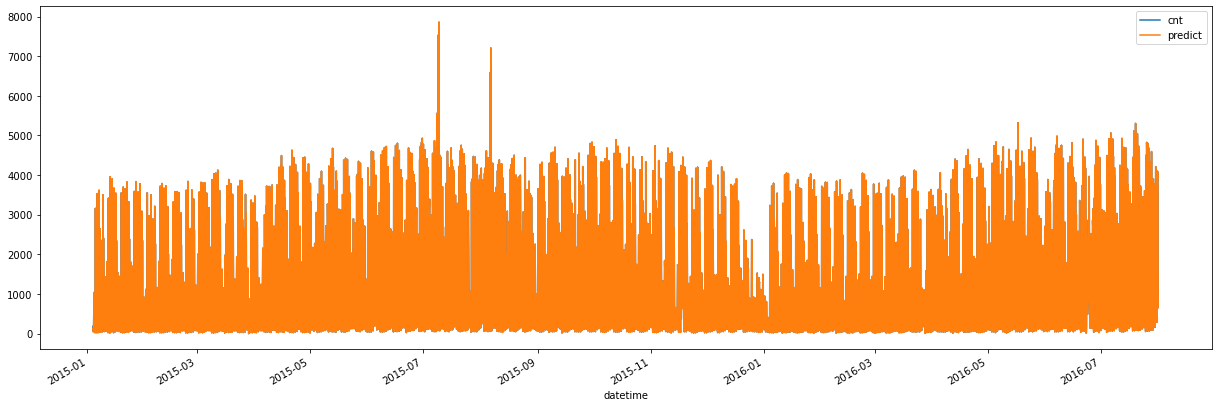

In [84]:
# 놀라울 정도로 예측이 잘됐음 
pd.concat([y_train, pd.DataFrame(predict_train, index=y_train.index, columns=['predict'])], axis=1).plot(kind='line', figsize=(21,7))

In [85]:
predict_train

array([ 138.05677838,  138.05968926,  134.063756  , ..., 1345.99232441,
        971.98888126,  656.98856456])

In [93]:
np.mean((y_train.values.flatten() - predict_train) ** 2)

0.1409977212254823

In [91]:
np.mean((y_train.values.flatten() - predict_train) ** 2)

0.1409977212254823

In [95]:
predict_test

array([372.00412765, 203.0033995 , 125.00314889, ..., 337.00213249,
       223.99983688, 138.9996444 ])

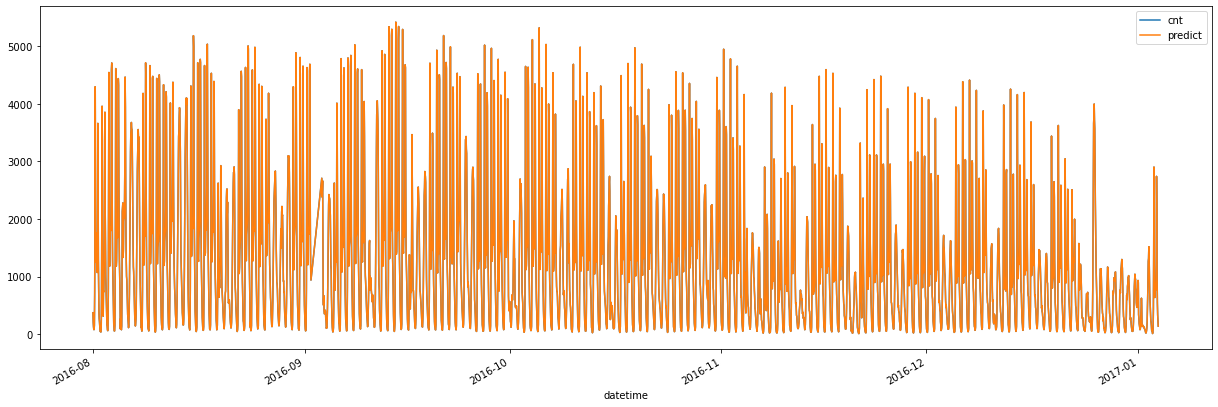

In [97]:
pd.concat([y_test, pd.DataFrame(predict_test, index=y_test.index, columns=['predict'])], axis=1).plot(kind='line', figsize=(21,7))

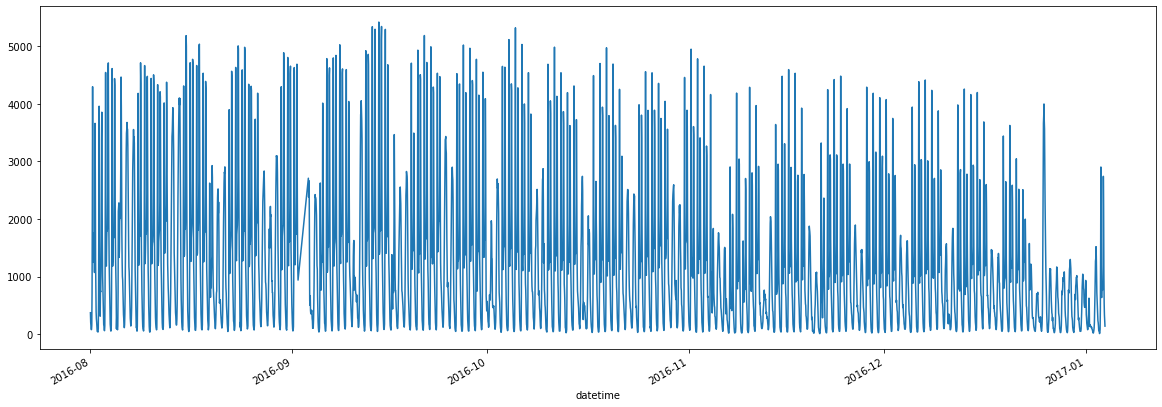

In [103]:
y_test.plot(figsize=(20,7))

In [105]:
# 0.00013의 오차율 
np.mean((y_test.values.flatten() - predict_test) **2)

0.00013075848271230817